### 문서 유사도 측정 방법 – 코사인 유사도
* 문서와 문서간의 유사도를 측정
* 문서 유사도 측정 지표
    * Cosine Similarity
    * Jaccard Similarity
    * Manhattan Distance
    * Eucliden Distance

**코사인 유사도 반환 함수 생성**

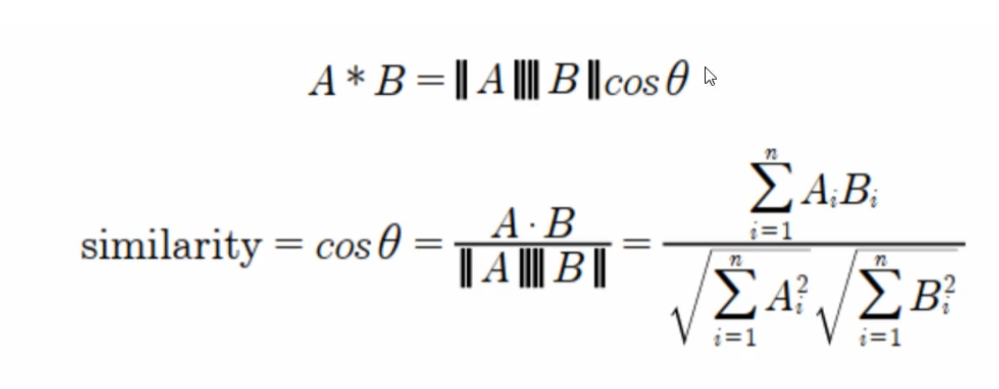

https://en.wikipedia.org/wiki/Cosine_similarity#:~:text=In%20data%20analysis%2C%20cosine%20similarity%20is%20a%20measure,vectors%20divided%20by%20the%20product%20of%20their%20lengths.


In [1]:
import numpy as np

def cos_similarity(v1, v2):             # 코사인유사도 함수를 정의. 위의 식을 직접 만든것
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

**TF-IDF 벡터화 후 코사인 유사도 비교**

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)            # 문장이 3개, feature가 18개 있다. 

(3, 18)


In [3]:
print(type(feature_vect_simple))

<class 'scipy.sparse._csr.csr_matrix'>


In [4]:
feature_vect_dense = feature_vect_simple.todense()
feature_vect_dense

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
         0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
         0.23402865, 0.39624495, 0.4680573 ],
        [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
         0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
         0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
         0.3660119 , 0.        , 0.3660119 ]])

In [5]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )       #feature_vect_dense의 첫번째 벡터
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫번째 문장과 두번째 문장의 feature vector로 두 개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity( vect1, vect2 )
print('문장1, 문장2  Cosine 유사도 : {0: .3f}'.format(similarity_simple))

문장1, 문장2 Cosine 유사도 :  0.402


In [6]:
#첫번째 문장의 벡터
np.array(feature_vect_dense[0])

array([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
        0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
        0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
        0.49087711, 0.        , 0.24543856]])

In [7]:
# 1차원이 됨
np.array(feature_vect_dense[0].reshape(-1, ))

array([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
        0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
        0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
        0.49087711, 0.        , 0.24543856]])

In [10]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장1, 문장3  Cosine 유사도 : {0: .3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장2, 문장3  Cosine 유사도 : {0: .3f}'.format(similarity_simple))

vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect1)
print('문장2, 문장3  Cosine 유사도 : {0: .3f}'.format(similarity_simple))

문장1, 문장3  Cosine 유사도 :  0.404
문장2, 문장3  Cosine 유사도 :  0.456
문장2, 문장3  Cosine 유사도 :  1.000


**사이킷런의 cosine_similarity()함수를 이용하여 비교**

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)

print(similarity_simple_pair)
# 첫번째문장-첫번째문장, 첫번재문장-두번째문장, 첫번째문장-세번째문장 비교

[[1.         0.40207758 0.40425045]]


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])

print(similarity_simple_pair)
# 첫번재문장-두번째문장, 첫번째문장-세번째문장 비교

[[0.40207758 0.40425045]]


In [13]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape: ', similarity_simple_pair.shape)
# 1-1, 1-2, 1-3
# 2-1, 2-2, 2-3
# 3-1, 3-2, 3-3 문장 비교

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape:  (3, 3)


### Opinion Review 데이터 셋을 이용한 문서 유사도 측정

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [21]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\Users\lenovo\Documents\aibootcamp\Machine Learning\data\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**호텔로 클러스터링 된 문서중에서 비슷한 문서를 추출**

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 클러스터링된 데이터 DF에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index      # [document_df['cluster_label']==1] 하면 자동차 데이터가 나온다.
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)


호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.38038865 0.32619948 0.51442299 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


[[10  8  9 12 13  7 11 14 15  5  3  4  2  1  6]]
Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

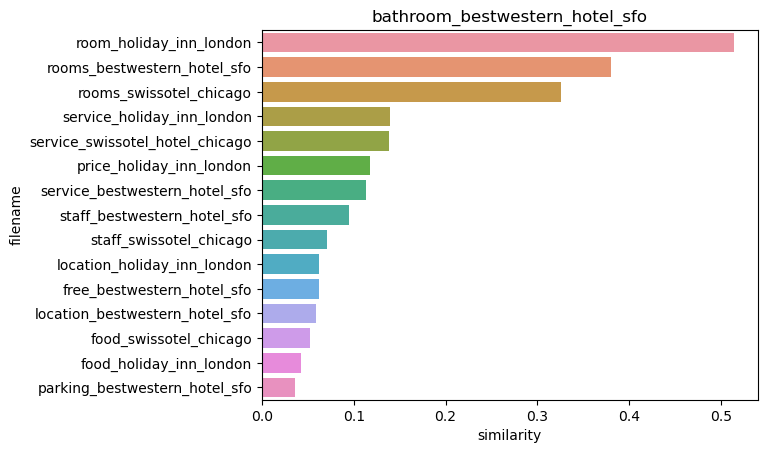

In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# argsort()를 이용 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]
print(sorted_index)

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
print(hotel_indexes)
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1,)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1,))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

### 참고자료
https://www.kaggle.com/c/mercari-price-suggestion-challenge